In [2]:
# import pandas as pd

# # Read the Parquet file into a DataFrame
# df = pd.read_parquet('train_data.parquet')


In [1]:
import pandas as pd
df = pd.read_parquet('train_data.parquet')


In [2]:
df_copy = df.copy()

In [3]:
threshould = .25
it = 0
for col in df.columns:
    
    if df[col].notnull().mean()<=threshould:
        it = it+1
        print(col)
print(it)


f3
f4
f13
f14
f15
f16
f17
f18
f19
f20
f21
f33
f34
f36
f37
f64
f66
f70
f79
f80
f81
f84
f88
f92
f112
f114
f116
f117
f118
f119
f120
f121
f122
f135
f136
f154
f176
f189
f205
f218
f220
f221
f360
43


In [4]:
threshould = .75
cols_to_drop = df.columns[df.isnull().mean() > threshould]
df= df.drop(columns = cols_to_drop)
df

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f356,f357,f358,f359,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,None,-9999.0,0.0,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,None,0.0,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,None,0.0,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,None,-9999.0,0.0,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,None,-9999.0,0.0,359.0,0.0,0.0,337.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,None,None,42.0,37.0,...,0.0032088697978057,0.0021005417064525,0.0404038812929242,0.0,90.0,1.0,0.0111111111111111,282.0,1.0,0.0035460992907801
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,None,None,42.0,37.0,...,0.0016354709256752,-0.0005843979733278,0.0506497784165768,0.0,33.0,0.0,0.0,58.0,1.0,0.0172413793103448
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,None,None,42.0,37.0,...,0.0026117798687227,0.0003542232402053,0.0498707994939233,0.0,33.0,0.0,0.0,58.0,1.0,0.0172413793103448
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,None,None,None,None,...,None,None,None,0.0,None,None,None,None,None,None


In [5]:
df.drop('f354', axis=1, inplace=True)
df.drop(['f54', 'f55', 'f56', 'f57'], axis=1, inplace=True)


In [6]:
def smart_column_conversion(df, exclude_cols=None):
    df = df.copy()
    if exclude_cols is None:
        exclude_cols = set()
    
    numeric_cols = []
    categorical_cols = []

    for col in df.columns:
        if col in exclude_cols:
            continue
        
        if df[col].dtype == 'object':
            try:
                converted = pd.to_numeric(df[col], errors='raise')
                df[col] = converted
                numeric_cols.append(col)
            except:
                categorical_cols.append(col)  # keep for encoding

    return df, numeric_cols, categorical_cols


In [7]:
EXCLUDE_COLS = {'id1', 'id4', 'id5'}
df_cleaned, numeric_cols, categorical_cols = smart_column_conversion(df, EXCLUDE_COLS)


In [8]:
# threshold = 0.30
# missing_cols = []

# for col in df.columns:
#     if df[col].isnull().mean() >= threshold:
#         missing_cols.append(col)

# print(missing_cols)
# print(len(missing_cols))
print(len(categorical_cols))

4


In [9]:
df_cleaned

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f356,f357,f358,f359,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,-9999.000000,0.0,28.0,0.0,0.000000,337.0,0.0,0.000000
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,87.0,0.0,0.000000,1010.0,2.0,0.001980
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,23.0,0.0,0.000000,1010.0,2.0,0.001980
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,-9999.000000,0.0,277.0,1.0,0.003610,337.0,0.0,0.000000
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,-9999.000000,0.0,359.0,0.0,0.000000,337.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.003209,0.002101,0.040404,0.0,90.0,1.0,0.011111,282.0,1.0,0.003546
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.001635,-0.000584,0.050650,0.0,33.0,0.0,0.000000,58.0,1.0,0.017241
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.002612,0.000354,0.049871,0.0,33.0,0.0,0.000000,58.0,1.0,0.017241
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
count_non_numeric = len(non_numeric_cols)

print(f"Number of non-numeric columns: {count_non_numeric}")
print("Non-numeric columns:", list(non_numeric_cols))


Number of non-numeric columns: 7
Non-numeric columns: ['id1', 'id4', 'id5', 'f42', 'f50', 'f52', 'f53']


In [11]:
import pandas as pd

# Assuming df_cleaned and categorical_cols are already defined as in your previous code

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)


In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns
count_non_numeric = len(non_numeric_cols)

print(f"Number of non-numeric columns: {count_non_numeric}")
print("Non-numeric columns:", list(non_numeric_cols))

Number of non-numeric columns: 9
Non-numeric columns: ['id1', 'id4', 'id5', 'f42_P', 'f42_R', 'f42_S', 'f50_Y', 'f52_Y', 'f53_NY']


In [13]:
# Convert all dummy columns to numeric, except for known date/id columns
exclude_cols = {'id1', 'id4', 'id5'}
for col in df_encoded.columns:
    if col not in exclude_cols and df_encoded[col].dtype == 'object':
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')


In [14]:
for col in ['f42_P', 'f42_R', 'f42_S', 'f50_Y', 'f52_Y', 'f53_NY']:
    print(f"{col}: {df_encoded[col].unique()}, dtype: {df_encoded[col].dtype}")


f42_P: [False  True], dtype: bool
f42_R: [False  True], dtype: bool
f42_S: [False  True], dtype: bool
f50_Y: [False  True], dtype: bool
f52_Y: [False  True], dtype: bool
f53_NY: [False  True], dtype: bool


In [15]:
bool_cols = ['f42_P', 'f42_R', 'f42_S', 'f50_Y', 'f52_Y', 'f53_NY']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [16]:
import pandas as pd

# Assuming 'df' is your DataFrame
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns
count_non_numeric = len(non_numeric_cols)

print(f"Number of non-numeric columns: {count_non_numeric}")
print("Non-numeric columns:", list(non_numeric_cols))

Number of non-numeric columns: 3
Non-numeric columns: ['id1', 'id4', 'id5']


In [17]:
df['id1'] = pd.to_datetime(df['id1'], errors='coerce')
df['id4'] = pd.to_datetime(df['id4'], errors='coerce')
df['id5'] = pd.to_datetime(df['id5'], errors='coerce')


/tmp/ipykernel_2034/1089433257.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['id1'] = pd.to_datetime(df['id1'], errors='coerce')


In [18]:
df_encoded

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f363,f364,f365,f366,f42_P,f42_R,f42_S,f50_Y,f52_Y,f53_NY
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,NaN,NaN,NaN,...,0.000000,337.0,0.0,0.000000,0,0,0,0,0,0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,NaN,NaN,NaN,...,0.000000,1010.0,2.0,0.001980,0,0,0,0,0,0
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,NaN,NaN,NaN,...,0.000000,1010.0,2.0,0.001980,0,0,0,0,0,0
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,NaN,NaN,NaN,...,0.003610,337.0,0.0,0.000000,0,0,0,0,0,0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,NaN,NaN,NaN,...,0.000000,337.0,0.0,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.011111,282.0,1.0,0.003546,0,0,0,0,0,0
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.000000,58.0,1.0,0.017241,0,0,0,0,0,0
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,NaN,NaN,42.0,37.0,...,0.000000,58.0,1.0,0.017241,0,0,0,0,0,0
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [19]:
import pandas as pd


empty_columns = df_encoded.columns[df_encoded.isnull().all()]
count_empty = len(empty_columns)

print(f"Number of completely empty columns: {count_empty}")
print("Empty columns:", list(empty_columns))


Number of completely empty columns: 0
Empty columns: []


In [20]:
def get_click_relevance_score(col, click_drivers):
    """
    Calculate click relevance score for a feature based on its category
    """
    relevance_scores = {
        'engagement_history': 0.9,  # Highest relevance - direct click predictor
        'spend_behavior': 0.8,      # High relevance - indicates offer preference
        'loyalty_status': 0.7,      # Medium-high relevance - affects loyalty offers
        'web_activity': 0.6,        # Medium relevance - digital engagement
        'customer_profile': 0.5     # Medium relevance - segmentation
    }
    
    # Find which category the column belongs to
    for category, features in click_drivers.items():
        if col in features:
            return relevance_scores.get(category, 0.3)
    
    # Default score for features not in click_drivers
    return 0.3


In [21]:
import pandas as pd
import numpy as np

def click_prediction_aware_imputation(df):
    """
    Imputation strategy specifically designed for click prediction modeling
    """
    df = df.copy()
    
    # Define feature categories based on click prediction relevance
    click_drivers = {
        'engagement_history': [f'f{i}' for i in range(94, 123)],  # Past offer interactions
        'spend_behavior': ['f39', 'f40', 'f41'],  # Spending patterns
        'loyalty_status': ['f43', 'f44', 'f45', 'f46', 'f47'],  # Loyalty engagement
        'web_activity': [f'f{i}' for i in range(59, 94)],  # Digital engagement
        'customer_profile': ['f42', 'f50', 'f53', 'f54', 'f55', 'f56', 'f57']  # Demographics
    }
    
    imputation_stats = {}
    
    # Store original patterns for click prediction features
    original_patterns = {}
    for category, features in click_drivers.items():
        for col in features:
            if col in df.columns and df[col].isnull().any():
                original_patterns[col] = df[col].isnull()
    
    # Click-prediction-specific imputation logic
    for col in df.columns:
        if col in ['id1', 'id4', 'id5'] or col.endswith(('_click_signal', '_engagement_level')):
            continue
            
        if col not in original_patterns:
            continue
            
        original_missing = original_patterns[col].sum()
        
        # ENGAGEMENT HISTORY - Critical for click prediction
        if col in click_drivers['engagement_history']:
            # Missing engagement = No past interaction = Lower click probability
            df[f'{col}_click_signal'] = create_click_signal(df[col])
            df[col] = df[col].fillna(0)  # No engagement = 0
            method = 'click_optimized_zero'
            
        # SPEND BEHAVIOR - Indicates offer preference
        elif col in click_drivers['spend_behavior']:
            # Missing spend = Different offer targeting needed
            df[f'{col}_spend_level'] = categorize_spend_for_clicks(df[col])
            df[col] = df[col].fillna(0)  # No spend = 0
            method = 'click_optimized_spend'
            
        # LOYALTY STATUS - Affects response to loyalty offers
        elif col in click_drivers['loyalty_status']:
            # Missing loyalty = Not enrolled = Different click patterns
            df[f'{col}_loyalty_tier'] = categorize_loyalty_for_clicks(df[col])
            df[col] = df[col].fillna(0)  # Not enrolled = 0
            method = 'click_optimized_loyalty'
            
        # WEB ACTIVITY - Digital engagement indicator
        elif col in click_drivers['web_activity']:
            # Missing web activity = Lower digital engagement = Lower click probability
            df[f'{col}_digital_engagement'] = categorize_digital_engagement(df[col])
            df[col] = df[col].fillna(0)  # No activity = 0
            method = 'click_optimized_digital'
            
        # CUSTOMER PROFILE - Segmentation for targeting
        elif col in click_drivers['customer_profile']:
            # Missing profile = Unknown segment = Default targeting
            df[f'{col}_segment'] = categorize_customer_segment(df[col])
            df[col] = df[col].fillna('Unknown_Segment')
            method = 'click_optimized_segment'
            
        else:
            # Fallback for other features
            if df[col].dtype.kind in 'biufc':
                df[col] = df[col].fillna(df[col].median())
                method = 'median_fallback'
            else:
                mode_val = df[col].mode()
                df[col] = df[col].fillna(mode_val[0] if len(mode_val) > 0 else 'Unknown')
                method = 'mode_fallback'
        
        # Track imputation for click prediction optimization
        final_missing = df[col].isnull().sum()
        imputation_stats[col] = {
            'original_missing': original_missing,
            'final_missing': final_missing,
            'method': method,
            'click_relevance': get_click_relevance_score(col, click_drivers)
        }
    
    return df, imputation_stats

def get_click_relevance_score(col, click_drivers):
    """
    Calculate click relevance score for a feature based on its category
    """
    relevance_scores = {
        'engagement_history': 0.9,  # Highest relevance - direct click predictor
        'spend_behavior': 0.8,      # High relevance - indicates offer preference
        'loyalty_status': 0.7,      # Medium-high relevance - affects loyalty offers
        'web_activity': 0.6,        # Medium relevance - digital engagement
        'customer_profile': 0.5     # Medium relevance - segmentation
    }
    
    # Find which category the column belongs to
    for category, features in click_drivers.items():
        if col in features:
            return relevance_scores.get(category, 0.3)
    
    # Default score for features not in click_drivers
    return 0.3

def create_click_signal(series):
    """Create click prediction signal from engagement data"""
    # High engagement = High click probability
    # No engagement (missing) = Low click probability
    return pd.cut(series.fillna(0), 
                  bins=[0, 1, 10, 100, float('inf')], 
                  labels=['No_Engagement', 'Low_Engagement', 'Medium_Engagement', 'High_Engagement'])

def categorize_spend_for_clicks(series):
    """Categorize spending for click prediction"""
    # Different spend levels indicate different offer preferences
    return pd.cut(series.fillna(0), 
                  bins=[0, 1, 100, 500, float('inf')], 
                  labels=['No_Spend', 'Low_Spend', 'Medium_Spend', 'High_Spend'])

def categorize_loyalty_for_clicks(series):
    """Categorize loyalty for click prediction"""
    # Loyalty level affects response to loyalty offers
    return pd.cut(series.fillna(0), 
                  bins=[0, 1, 1000, 5000, float('inf')], 
                  labels=['Not_Enrolled', 'Basic_Member', 'Active_Member', 'Premium_Member'])

def categorize_digital_engagement(series):
    """Categorize digital engagement for click prediction"""
    # Digital activity indicates likelihood to click digital offers
    return pd.cut(series.fillna(0), 
                  bins=[0, 1, 5, 20, float('inf')], 
                  labels=['No_Digital', 'Low_Digital', 'Medium_Digital', 'High_Digital'])

def categorize_customer_segment(series):
    """Categorize customer segments for targeted offers"""
    # Customer segments get different offer types
    if series.dtype == 'object':
        return series.fillna('Unknown_Segment')
    else:
        return pd.cut(series.fillna(-1), 
                      bins=[-2, 0, 1, 2, 3, float('inf')], 
                      labels=['Unknown_Segment', 'Segment_A', 'Segment_B', 'Segment_C', 'Segment_D'])


In [22]:
def create_click_prediction_features(df):
    """
    Create features specifically designed for click prediction
    """
    
    # 1. ENGAGEMENT PROPENSITY SCORE
    engagement_cols = [col for col in df.columns if col.endswith('_click_signal')]
    if engagement_cols:
        # Convert categorical to numeric for scoring
        engagement_numeric = pd.get_dummies(df[engagement_cols], prefix='eng').sum(axis=1)
        df['engagement_propensity_score'] = engagement_numeric / len(engagement_cols)
    
    # 2. SPEND-BASED OFFER AFFINITY
    spend_cols = [col for col in df.columns if col.endswith('_spend_level')]
    if spend_cols:
        # High spenders more likely to click premium offers
        df['premium_offer_affinity'] = (df[spend_cols].apply(lambda x: x.str.contains('High_Spend|Medium_Spend')).sum(axis=1) > 0).astype(int)
        df['budget_offer_affinity'] = (df[spend_cols].apply(lambda x: x.str.contains('Low_Spend|No_Spend')).sum(axis=1) > 0).astype(int)
    
    # 3. LOYALTY-BASED CLICK PROBABILITY
    loyalty_cols = [col for col in df.columns if col.endswith('_loyalty_tier')]
    if loyalty_cols:
        # Loyalty members more likely to click loyalty offers
        df['loyalty_offer_click_prob'] = (df[loyalty_cols].apply(lambda x: x.str.contains('Active_Member|Premium_Member')).sum(axis=1) > 0).astype(int)
    
    # 4. DIGITAL ENGAGEMENT SCORE
    digital_cols = [col for col in df.columns if col.endswith('_digital_engagement')]
    if digital_cols:
        # Digital engagement indicates online offer click probability
        df['digital_offer_click_prob'] = (df[digital_cols].apply(lambda x: x.str.contains('Medium_Digital|High_Digital')).sum(axis=1) > 0).astype(int)
    
    # 5. CUSTOMER CLICK PROFILE
    # Combine all signals into a comprehensive click profile
    profile_features = ['engagement_propensity_score', 'premium_offer_affinity', 'loyalty_offer_click_prob', 'digital_offer_click_prob']
    existing_features = [f for f in profile_features if f in df.columns]
    
    if existing_features:
        df['overall_click_propensity'] = df[existing_features].mean(axis=1)
        df['click_profile_segment'] = pd.cut(df['overall_click_propensity'], 
                                           bins=[0, 0.25, 0.5, 0.75, 1.0], 
                                           labels=['Low_Clicker', 'Medium_Clicker', 'High_Clicker', 'Super_Clicker'])
    
    return df


In [23]:
def create_offer_customer_interaction_features(df):
    """
    Create features that capture customer-offer interaction patterns
    """
    
    # Assuming offer information is available in the dataset
    # These features help with offer ranking
    
    # 1. CATEGORY MATCH SCORE
    # Match customer spend patterns with offer categories
    if 'offer_category' in df.columns:
        spend_categories = ['f39', 'f40', 'f41']  # Lifestyle, Travel, Dining
        for i, spend_col in enumerate(spend_categories):
            if spend_col in df.columns:
                category_name = ['lifestyle', 'travel', 'dining'][i]
                df[f'{category_name}_offer_match'] = (
                    (df[spend_col] > 0) & 
                    (df['offer_category'].str.contains(category_name, case=False, na=False))
                ).astype(int)
    
    # 2. ENGAGEMENT HISTORY MATCH
    # Match past engagement with current offer type
    engagement_features = [f'f{i}' for i in range(94, 123)]
    existing_engagement = [col for col in engagement_features if col in df.columns]
    
    if existing_engagement and 'offer_type' in df.columns:
        df['past_engagement_with_offer_type'] = 0
        for eng_col in existing_engagement:
            # If customer engaged with similar offers before
            df['past_engagement_with_offer_type'] += (df[eng_col] > 0).astype(int)
        
        df['past_engagement_with_offer_type'] = (df['past_engagement_with_offer_type'] > 0).astype(int)
    
    # 3. TIMING RELEVANCE
    # Consider if customer is likely to click based on timing
    if 'offer_timing' in df.columns:
        # Weekend offers for leisure spenders, weekday for business
        df['timing_relevance'] = calculate_timing_relevance(df)
    
    return df


In [24]:
# Apply click-optimized imputation
df_imputed, stats = click_prediction_aware_imputation(df_encoded)


In [25]:
# Create click prediction features
df_with_features = create_click_prediction_features(df_imputed)


In [26]:
# Add interaction features for ranking
df_final = create_offer_customer_interaction_features(df_with_features)


In [27]:
df_final

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f111_click_signal,f113_click_signal,f115_click_signal,engagement_propensity_score,premium_offer_affinity,budget_offer_affinity,loyalty_offer_click_prob,digital_offer_click_prob,overall_click_propensity,click_profile_segment
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.40,0,0,0,1,0.3500,Medium_Clicker
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.40,0,0,0,1,0.3500,Medium_Clicker
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.40,0,0,0,1,0.3500,Medium_Clicker
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.40,0,0,0,1,0.3500,Medium_Clicker
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.40,0,0,0,1,0.3500,Medium_Clicker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,NaN,NaN,42.0,37.0,...,NaN,NaN,NaN,0.40,1,1,1,1,0.8500,Super_Clicker
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,NaN,NaN,42.0,37.0,...,NaN,NaN,NaN,0.40,1,1,1,1,0.8500,Super_Clicker
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,NaN,NaN,42.0,37.0,...,NaN,NaN,NaN,0.40,1,1,1,1,0.8500,Super_Clicker
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,NaN,NaN,NaN,NaN,...,No_Engagement,No_Engagement,NaN,0.50,1,0,0,1,0.6250,High_Clicker


In [28]:
def cleanup_remaining_nans(df):
    """
    Clean up any remaining NaN values after imputation pipeline
    Handles categorical columns properly
    """
    df = df.copy()
    
    # Exclude datetime and ID columns from cleanup
    exclude_cols = ['id1', 'id4', 'id5']
    
    for col in df.columns:
        if col in exclude_cols:
            continue
            
        if df[col].isnull().any():  
            if df[col].dtype.kind in 'biufc':  # Numeric
                # For numeric columns, fill with 0
                df[col] = df[col].fillna(0)
            else:  # Categorical or Object
                # Check if it's a categorical column
                if pd.api.types.is_categorical_dtype(df[col]):
                    # Add 'Unknown' to categories first, then fill
                    if 'Unknown' not in df[col].cat.categories:
                        df[col] = df[col].cat.add_categories(['Unknown'])
                    df[col] = df[col].fillna('Unknown')
                else:
                    # For regular object columns, fill directly
                    df[col] = df[col].fillna('Unknown')
    
    return df
df_final_clean = cleanup_remaining_nans(df_final)

/tmp/ipykernel_2034/1928540722.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [29]:
df_final_clean

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f111_click_signal,f113_click_signal,f115_click_signal,engagement_propensity_score,premium_offer_affinity,budget_offer_affinity,loyalty_offer_click_prob,digital_offer_click_prob,overall_click_propensity,click_profile_segment
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,No_Engagement,No_Engagement,Unknown,0.50,1,0,0,1,0.6250,High_Clicker


In [30]:
import pandas as pd
df4 = pd.read_parquet('add_event_dataset.parquet')

In [31]:
df5 = pd.read_parquet('offermeta_dataset.parquet')

In [32]:
# df_final_clean['id3'].dtype

In [33]:
df5['end_ts'] = pd.to_datetime(df5['end_ts'], errors='coerce')
df5['start_ts'] = pd.to_datetime(df5['start_ts'], errors='coerce')
# df['id5'] = pd.to_datetime(df['id5'], errors='coerce')

In [34]:
df5['id3'] = df5['id3'].astype(int)
df4['id3'] = df4['id3'].astype(int)

In [35]:
df_final_clean

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,f111_click_signal,f113_click_signal,f115_click_signal,engagement_propensity_score,premium_offer_affinity,budget_offer_affinity,loyalty_offer_click_prob,digital_offer_click_prob,overall_click_propensity,click_profile_segment
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,Unknown,Unknown,Unknown,0.40,0,0,0,1,0.3500,Medium_Clicker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,42.0,37.0,...,Unknown,Unknown,Unknown,0.40,1,1,1,1,0.8500,Super_Clicker
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,No_Engagement,No_Engagement,Unknown,0.50,1,0,0,1,0.6250,High_Clicker


In [36]:
def preprocess_datetime_columns(offermeta_df, train_df):
    """
    Ensure datetime columns have correct data types in both datasets
    """
    # Process offermeta dataset
    df_meta = offermeta_df.copy()
    datetime_cols_meta = ['start_ts', 'end_ts']
    for col in datetime_cols_meta:
        if col in df_meta.columns:
            df_meta[col] = pd.to_datetime(df_meta[col], errors='coerce')
    
    # Process training dataset
    df_train = train_df.copy()
    datetime_cols_train = ['id5', 'id4', 'id1']  # Add other datetime columns as needed
    for col in datetime_cols_train:
        if col in df_train.columns:
            df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    
    return df_meta, df_train


In [37]:
def hybrid_temporal_imputation(train_df, missing_ids, offermeta_df):
    """
    Estimate start_ts, end_ts, offerduration for offers missing in metadata.
    Enhanced version with proper datetime handling for all datasets.
    """
    # Convert datetime columns in offermeta if not already done
    df_meta = offermeta_df.copy()
    df_meta['start_ts'] = pd.to_datetime(df_meta['start_ts'], errors='coerce')
    df_meta['end_ts'] = pd.to_datetime(df_meta['end_ts'], errors='coerce')
    
    # Calculate duration in days
    df_meta['duration_days'] = (df_meta['end_ts'] - df_meta['start_ts']).dt.days
    
    # Calculate percentiles for duration estimation
    pct = df_meta['duration_days'].quantile([0.25, 0.5, 0.75, 0.95])
    
    # Get interaction periods for missing offers
    missing_offers = train_df[train_df['id3'].isin(missing_ids)].copy()
    
    # **KEY FIX: Convert id5 to datetime if it's not already**
    if missing_offers['id5'].dtype == 'object':
        missing_offers['id5'] = pd.to_datetime(missing_offers['id5'], errors='coerce')
    
    # Calculate interaction spans
    spans = missing_offers.groupby('id3')['id5'].agg(['min', 'max'])
    spans['obs_span'] = (spans['max'] - spans['min']).dt.days
    
    # Build temporal features using hybrid logic
    result = {}
    for offer_id, row in spans.iterrows():
        first, last, span = row['min'], row['max'], row['obs_span']
        
        # Handle NaN spans (single interaction)
        if pd.isna(span):
            span = 0
        
        # Hybrid duration logic
        if span <= 7:
            dur = max(pct[0.25], span + 7)
        elif span >= 30:
            dur = max(pct[0.75], span + 30)
        else:
            dur = max(pct[0.5], span + 14)
        
        result[offer_id] = {
            'start_ts': first,
            'end_ts': first + pd.Timedelta(days=dur),
            'offerduration': dur
        }
    
    return result


In [38]:
def standardize_column_names(offermeta_df):
    """
    Standardize column names to match function expectations
    """
    df = offermeta_df.copy()
    
    column_mapping = {
        'discount_rate_num': 'discountrate',
        'ind_1': 'numind1',
        'ind_2': 'ind2',
        'body_flag_N': 'bodyflag',
        'redeem_once': 'redeemonce',
        'redeem_unlimited': 'redeemunlimited',
        'offer_duration': 'offerduration'
    }
    
    # Rename columns that exist
    existing_mappings = {old: new for old, new in column_mapping.items() if old in df.columns}
    df = df.rename(columns=existing_mappings)
    
    return df


In [39]:
def robust_corrected_merge_with_temporal_logic(train_df, offermeta_df, add_event_df):
    """
    Enhanced version with proper column handling and robust imputation
    """
    # Standardize column names
    offermeta_df = standardize_column_names(offermeta_df)
    
    # Convert datetime columns in training data
    train_df = train_df.copy()
    datetime_cols = ['id5', 'id4', 'id1']
    for col in datetime_cols:
        if col in train_df.columns and train_df[col].dtype == 'object':
            train_df[col] = pd.to_datetime(train_df[col], errors='coerce')
    
    # Identify missing offers
    train_ids = set(train_df['id3'])
    meta_ids = set(offermeta_df['id3'])
    missing = train_ids - meta_ids
    
    print(f"Offers missing from offermeta: {len(missing)}")
    
    # Compute temporal features for missing offers
    if missing:
        temporal = hybrid_temporal_imputation(train_df, missing, offermeta_df)
    else:
        temporal = {}
    
    # Phase 1: Merge with offermeta
    merged = train_df.merge(offermeta_df, on='id3', how='left')
    
    # **ROBUST IMPUTATION FOR ALL MISSING VALUES**
    # Create a mask for all rows with missing metadata
    missing_mask = merged['discountrate'].isnull()
    
    if missing_mask.any():
        print(f"Imputing {missing_mask.sum()} rows with missing metadata")
        
        # Fill temporal features
        for oid in missing:
            if oid in temporal:
                mask = merged['id3'] == oid
                merged.loc[mask, 'start_ts'] = temporal[oid]['start_ts']
                merged.loc[mask, 'end_ts'] = temporal[oid]['end_ts']
                merged.loc[mask, 'offerduration'] = temporal[oid]['offerduration']
        
        # Fill business defaults for ALL missing values
        merged.loc[missing_mask, 'discountrate'] = 0.1
        merged.loc[missing_mask, 'numind1'] = False
        merged.loc[missing_mask, 'ind2'] = False
        merged.loc[missing_mask, 'bodyflag'] = 0
        merged.loc[missing_mask, 'redeemonce'] = True
        merged.loc[missing_mask, 'redeemunlimited'] = False
    
    # Phase 2: Merge with event data
    final = merged.merge(add_event_df, on='id3', how='left')
    
    # Handle event data columns that exist
    event_cols = {
        'eventcount': 0,
        'pctmobiletimeline': 0.33,
        'pctofferstab': 0.33,
        'pcttiles': 0.34
    }
    
    for col, default_val in event_cols.items():
        if col in final.columns:
            final[col] = final[col].fillna(default_val)
    
    # Add imputation indicator
    final['temporal_imputed'] = final['id3'].isin(missing).astype(int)
    
    return final


In [40]:
# Step 1: Preprocess datetime columns
df5_processed, df_final_clean_processed = preprocess_datetime_columns(df5, df_final_clean)

# Step 2: Use the robust merge function
final_df = robust_corrected_merge_with_temporal_logic(df_final_clean_processed, df5_processed, df4)

# Step 3: Validate results
remaining_nan = final_df.isnull().sum()
columns_with_nan = remaining_nan[remaining_nan > 0]

print("=== FINAL VALIDATION ===")
if len(columns_with_nan) > 0:
    print(f"Columns still with NaN values: {len(columns_with_nan)}")
    for col, count in columns_with_nan.items():
        if col not in ['id1', 'id4']:  # Expected to have NaN
            print(f"  ⚠️ {col}: {count} NaN values")
else:
    print("✅ All NaN values successfully handled!")


/tmp/ipykernel_2034/1262879030.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col], errors='coerce')


Offers missing from offermeta: 4
Imputing 100 rows with missing metadata
=== FINAL VALIDATION ===
Columns still with NaN values: 1


In [41]:
# Identify which column still has NaN values
remaining_nan = final_df.isnull().sum()
problematic_cols = remaining_nan[remaining_nan > 0]
print("Columns with remaining NaN values:")
print(problematic_cols)


Columns with remaining NaN values:
id1    770164
dtype: int64


In [42]:
# Your dataset is ready for click prediction modeling
print("✅ Dataset is ready for modeling!")
print(f"Shape: {final_df.shape}")
print(f"Only id1 has NaN values (expected behavior)")

# Continue with feature engineering or model training
# The id1 column can be ignored for click prediction


✅ Dataset is ready for modeling!
Shape: (770164, 403)
Only id1 has NaN values (expected behavior)


In [43]:
final_df 

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,offerduration,redeemonce,redeemunlimited,event_count,first_seen,last_seen,pct_mobile_timeline,pct_offers_tab,pct_tiles,temporal_imputed
0,NaT,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,29.0,False,True,18238,2023-11-01 00:02:48.157,2023-11-03 23:59:38.752,0.073363,0.584878,0.341759,0
1,NaT,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,181.0,False,True,20780,2023-11-01 00:02:07.254,2023-11-03 23:59:52.085,0.067324,0.605727,0.326949,0
2,NaT,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,29.0,False,True,18296,2023-11-01 00:02:48.023,2023-11-03 23:59:03.252,0.074060,0.585756,0.340184,0
3,NaT,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,29.0,False,True,18012,2023-11-01 00:02:48.743,2023-11-03 23:58:58.116,0.077781,0.574062,0.348157,0
4,NaT,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,29.0,False,True,18428,2023-11-01 00:02:49.701,2023-11-03 23:59:05.369,0.075809,0.577654,0.346538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,NaT,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,42.0,37.0,...,90.0,True,False,60904,2023-10-22 00:02:20.573,2023-11-03 23:58:47.719,0.095872,0.558075,0.346053,0
770160,NaT,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,42.0,37.0,...,182.0,True,False,44999,2023-10-22 00:00:49.287,2023-11-03 23:58:42.855,0.090802,0.551012,0.358186,0
770161,NaT,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,42.0,37.0,...,105.0,True,False,46044,2023-10-22 00:00:16.130,2023-11-03 23:57:39.219,0.087373,0.552797,0.359830,0
770162,NaT,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,120.0,True,False,20993,2023-11-01 00:02:13.335,2023-11-03 23:59:19.548,0.067070,0.601057,0.331873,0


In [44]:
def analyze_data_dictionary(data_dict_path="data_dictionary.csv"):
    """
    Analyze data dictionary to understand actual column meanings and categorize them
    """
    import pandas as pd
    
    # Load data dictionary
    data_dict = pd.read_csv(data_dict_path)
    
    # Create column categorization based on descriptions
    column_categories = {
        'customer_demographics': [],
        'spending_behavior': [],
        'loyalty_engagement': [],
        'web_activity': [],
        'offer_engagement': [],
        'transaction_features': [],
        'temporal_features': [],
        'account_features': []
    }
    
    # Analyze each column description
    for _, row in data_dict.iterrows():
        col_name = row.get('column_name', row.get('feature', ''))
        description = str(row.get('description', row.get('meaning', ''))).lower()
        
        # Categorize based on description keywords
        if any(keyword in description for keyword in ['spend', 'purchase', 'transaction', 'amount']):
            column_categories['spending_behavior'].append(col_name)
        elif any(keyword in description for keyword in ['loyalty', 'points', 'miles', 'tier', 'status']):
            column_categories['loyalty_engagement'].append(col_name)
        elif any(keyword in description for keyword in ['click', 'impression', 'view', 'engagement', 'interaction']):
            column_categories['offer_engagement'].append(col_name)
        elif any(keyword in description for keyword in ['web', 'online', 'digital', 'mobile', 'timeline']):
            column_categories['web_activity'].append(col_name)
        elif any(keyword in description for keyword in ['age', 'gender', 'demographic', 'profile']):
            column_categories['customer_demographics'].append(col_name)
        elif any(keyword in description for keyword in ['account', 'creation', 'tenure', 'membership']):
            column_categories['account_features'].append(col_name)
        elif any(keyword in description for keyword in ['time', 'date', 'duration', 'recency']):
            column_categories['temporal_features'].append(col_name)
        else:
            column_categories['transaction_features'].append(col_name)
    
    return column_categories

# Usage
column_categories = analyze_data_dictionary()


In [45]:
def create_offer_validity_features(df):
    """
    Create features based on offer validity, duration, and lifecycle
    """
    df = df.copy()
    
    # Ensure datetime columns are properly converted
    df['offer_date'] = pd.to_datetime(df['id5'])
    df['offer_start'] = pd.to_datetime(df['start_ts'])
    df['offer_end'] = pd.to_datetime(df['end_ts'])
    
    # CORE VALIDITY FEATURES
    df['offer_is_active'] = (
        (df['offer_date'] >= df['offer_start']) & 
        (df['offer_date'] <= df['offer_end'])
    ).astype(int)
    
    df['offer_expired'] = (df['offer_date'] > df['offer_end']).astype(int)
    df['offer_not_yet_started'] = (df['offer_date'] < df['offer_start']).astype(int)
    
    # DURATION-BASED FEATURES
    df['days_until_expiry'] = (df['offer_end'] - df['offer_date']).dt.days
    df['days_since_start'] = (df['offer_date'] - df['offer_start']).dt.days
    df['offer_progress_pct'] = df['days_since_start'] / df['offerduration'].replace(0, 1)
    
    # URGENCY FEATURES
    df['offer_urgency_high'] = (df['days_until_expiry'] <= 3).astype(int)
    df['offer_urgency_medium'] = ((df['days_until_expiry'] > 3) & (df['days_until_expiry'] <= 7)).astype(int)
    df['offer_urgency_low'] = (df['days_until_expiry'] > 7).astype(int)
    
    # DURATION CATEGORIES
    df['offer_duration_category'] = pd.cut(
        df['offerduration'], 
        bins=[0, 7, 30, 90, 365, float('inf')], 
        labels=['Very_Short', 'Short', 'Medium', 'Long', 'Extended']
    )
    
    # VALIDITY WEIGHT (for weighting historical features)
    df['validity_weight'] = (
        df['offer_is_active'] * 1.0 +
        df['offer_expired'] * 0.1 +
        df['offer_not_yet_started'] * 0.05
    )
    
    return df


In [46]:
def create_customer_behavior_features(df, column_categories):
    """
    Create customer behavior features based on actual column meanings
    """
    df = df.copy()
    
    # SPENDING BEHAVIOR FEATURES (based on data dictionary)
    spending_cols = [col for col in column_categories['spending_behavior'] if col in df.columns]
    if spending_cols:
        df['customer_total_spend'] = df[spending_cols].sum(axis=1)
        df['customer_active_spend_categories'] = df[spending_cols].gt(0).sum(axis=1)
        df['customer_spend_diversity'] = df['customer_active_spend_categories'] / len(spending_cols)
        df['customer_max_category_spend'] = df[spending_cols].max(axis=1)
        df['customer_avg_category_spend'] = df[spending_cols].mean(axis=1)
        df['customer_spend_concentration'] = df['customer_max_category_spend'] / df['customer_total_spend'].replace(0, 1)
    
    # LOYALTY ENGAGEMENT FEATURES (based on data dictionary)
    loyalty_cols = [col for col in column_categories['loyalty_engagement'] if col in df.columns]
    if loyalty_cols:
        df['customer_loyalty_score'] = df[loyalty_cols].sum(axis=1)
        df['customer_loyalty_diversity'] = df[loyalty_cols].gt(0).sum(axis=1)
        df['customer_is_loyalty_member'] = (df['customer_loyalty_score'] > 0).astype(int)
        df['customer_loyalty_intensity'] = df[loyalty_cols].mean(axis=1)
        df['customer_max_loyalty_feature'] = df[loyalty_cols].max(axis=1)
    
    # WEB ACTIVITY FEATURES (based on data dictionary)
    web_cols = [col for col in column_categories['web_activity'] if col in df.columns]
    if web_cols:
        df['customer_web_activity_score'] = df[web_cols].sum(axis=1)
        df['customer_digital_engagement_breadth'] = df[web_cols].gt(0).sum(axis=1)
        df['customer_avg_web_activity'] = df[web_cols].mean(axis=1)
        df['customer_is_digital_active'] = (df['customer_web_activity_score'] > 0).astype(int)
    
    # OFFER ENGAGEMENT FEATURES (based on data dictionary)
    engagement_cols = [col for col in column_categories['offer_engagement'] if col in df.columns]
    if engagement_cols:
        df['customer_offer_engagement_score'] = df[engagement_cols].sum(axis=1)
        df['customer_engagement_diversity'] = df[engagement_cols].gt(0).sum(axis=1)
        df['customer_avg_offer_engagement'] = df[engagement_cols].mean(axis=1)
        df['customer_max_engagement_feature'] = df[engagement_cols].max(axis=1)
    
    # CLICK HISTORY FEATURES (weighted by offer validity)
    df['customer_valid_clicks'] = df.groupby('id2')['y'].transform(lambda x: (x * df.loc[x.index, 'validity_weight']).sum())
    df['customer_valid_impressions'] = df.groupby('id2')['validity_weight'].transform('sum')
    df['customer_valid_ctr'] = df['customer_valid_clicks'] / df['customer_valid_impressions'].replace(0, 1)
    
    df['customer_total_clicks'] = df.groupby('id2')['y'].transform('sum')
    df['customer_total_offers'] = df.groupby('id2')['id3'].transform('count')
    df['customer_overall_ctr'] = df['customer_total_clicks'] / df['customer_total_offers']
    
    return df


In [47]:
def create_temporal_features(df):
    """
    Create comprehensive temporal features for click prediction
    """
    df = df.copy()
    
    # Ensure datetime conversion
    df['offer_date'] = pd.to_datetime(df['id5'])
    df['event_timestamp'] = pd.to_datetime(df['id4'])
    
    # CALENDAR-BASED FEATURES
    df['day_of_week'] = df['offer_date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_monday'] = (df['day_of_week'] == 0).astype(int)
    df['is_friday'] = (df['day_of_week'] == 4).astype(int)
    df['day_of_month'] = df['offer_date'].dt.day
    df['month'] = df['offer_date'].dt.month
    df['quarter'] = df['offer_date'].dt.quarter
    df['is_month_end'] = (df['day_of_month'] >= 28).astype(int)
    df['is_month_start'] = (df['day_of_month'] <= 3).astype(int)
    
    # TIME-BASED FEATURES
    df['offer_hour'] = df['event_timestamp'].dt.hour
    df['is_business_hours'] = ((df['offer_hour'] >= 9) & (df['offer_hour'] <= 17)).astype(int)
    df['is_evening'] = ((df['offer_hour'] >= 18) & (df['offer_hour'] <= 22)).astype(int)
    df['is_night'] = ((df['offer_hour'] >= 23) | (df['offer_hour'] <= 5)).astype(int)
    df['is_morning'] = ((df['offer_hour'] >= 6) & (df['offer_hour'] <= 11)).astype(int)
    
    # CUSTOMER TEMPORAL PATTERNS
    df['customer_first_offer_date'] = df.groupby('id2')['offer_date'].transform('min')
    df['customer_last_offer_date'] = df.groupby('id2')['offer_date'].transform('max')
    df['customer_tenure_days'] = (df['customer_last_offer_date'] - df['customer_first_offer_date']).dt.days
    df['days_since_first_offer'] = (df['offer_date'] - df['customer_first_offer_date']).dt.days
    df['days_since_last_offer'] = (df['customer_last_offer_date'] - df['offer_date']).dt.days
    
    # OFFER TEMPORAL PATTERNS
    df['offer_first_seen'] = df.groupby('id3')['offer_date'].transform('min')
    df['offer_last_seen'] = df.groupby('id3')['offer_date'].transform('max')
    df['offer_age_days'] = (df['offer_date'] - df['offer_first_seen']).dt.days
    df['offer_remaining_days'] = (df['offer_last_seen'] - df['offer_date']).dt.days
    
    # SEQUENCE FEATURES
    df['customer_offer_sequence'] = df.groupby('id2').cumcount() + 1
    df['offer_customer_sequence'] = df.groupby('id3').cumcount() + 1
    df['daily_offer_sequence'] = df.groupby(['id2', 'offer_date']).cumcount() + 1
    
    return df


In [48]:
def create_offer_features(df):
    """
    Create comprehensive offer-based features
    """
    df = df.copy()
    
    # OFFER PERFORMANCE METRICS (validity-weighted)
    df['offer_valid_clicks'] = df.groupby('id3')['y'].transform(lambda x: (x * df.loc[x.index, 'validity_weight']).sum())
    df['offer_valid_impressions'] = df.groupby('id3')['validity_weight'].transform('sum')
    df['offer_valid_ctr'] = df['offer_valid_clicks'] / df['offer_valid_impressions'].replace(0, 1)
    
    df['offer_total_clicks'] = df.groupby('id3')['y'].transform('sum')
    df['offer_total_impressions'] = df.groupby('id3')['id3'].transform('count')
    df['offer_overall_ctr'] = df['offer_total_clicks'] / df['offer_total_impressions']
    
    # OFFER RANKING FEATURES
    df['offer_ctr_rank'] = df.groupby('offer_date')['offer_valid_ctr'].rank(method='dense', ascending=False)
    df['offer_popularity_rank'] = df.groupby('offer_date')['offer_total_clicks'].rank(method='dense', ascending=False)
    df['offer_impression_rank'] = df.groupby('offer_date')['offer_total_impressions'].rank(method='dense', ascending=False)
    
    # DISCOUNT AND REDEMPTION FEATURES
    if 'discountrate' in df.columns:
        df['is_discounted_offer'] = (df['discountrate'] > 0).astype(int)
        df['discount_tier'] = pd.cut(df['discountrate'], 
                                   bins=[0, 0.05, 0.15, 0.3, 1.0], 
                                   labels=['No_Discount', 'Low', 'Medium', 'High'])
        df['discount_attractiveness'] = df['discountrate'] * df['offer_valid_ctr']
    
    if 'redeemonce' in df.columns:
        df['is_single_use_offer'] = df['redeemonce'].astype(int)
    
    if 'redeemunlimited' in df.columns:
        df['is_unlimited_redemption'] = df['redeemunlimited'].astype(int)
    
    # OFFER LIFECYCLE FEATURES
    df['offer_days_active'] = df.groupby('id3')['offer_date'].transform(lambda x: (x.max() - x.min()).days + 1)
    df['offer_daily_impression_rate'] = df['offer_total_impressions'] / df['offer_days_active']
    df['offer_daily_click_rate'] = df['offer_total_clicks'] / df['offer_days_active']
    
    # OFFER TIMING PERFORMANCE
    df['offer_weekend_performance'] = df.groupby('id3')['is_weekend'].transform('mean')
    df['offer_business_hours_performance'] = df.groupby('id3')['is_business_hours'].transform('mean')
    df['offer_peak_hour'] = df.groupby('id3')['offer_hour'].transform(lambda x: x.mode()[0] if not x.mode().empty else 12)
    
    return df


In [49]:
def create_interaction_features(df, column_categories):
    """
    Create sophisticated customer-offer interaction features
    """
    df = df.copy()
    
    # CUSTOMER-OFFER AFFINITY MATCHING
    df['customer_offer_ctr_match'] = df['customer_valid_ctr'] * df['offer_valid_ctr']
    df['customer_offer_popularity_match'] = df['customer_overall_ctr'] * df['offer_overall_ctr']
    
    # SPENDING-DISCOUNT ALIGNMENT
    if 'customer_total_spend' in df.columns and 'discountrate' in df.columns:
        df['spend_discount_alignment'] = df['customer_total_spend'] * df['discountrate']
        df['high_spender_discount_match'] = (df['customer_total_spend'] > df['customer_total_spend'].median()).astype(int) * df['is_discounted_offer']
    
    # TIMING ALIGNMENT
    df['customer_weekend_preference'] = df.groupby('id2')['is_weekend'].transform('mean')
    df['customer_business_hours_preference'] = df.groupby('id2')['is_business_hours'].transform('mean')
    df['timing_preference_match'] = abs(df['customer_weekend_preference'] - df['offer_weekend_performance'])
    
    # ENGAGEMENT PATTERN MATCHING
    if 'customer_loyalty_score' in df.columns:
        df['loyalty_offer_match'] = df['customer_loyalty_score'] * df['offer_valid_ctr']
        df['loyalty_discount_synergy'] = df['customer_is_loyalty_member'] * df['is_discounted_offer']
    
    if 'customer_web_activity_score' in df.columns:
        df['digital_engagement_match'] = df['customer_web_activity_score'] * df['offer_valid_ctr']
        df['digital_customer_offer_fit'] = df['customer_is_digital_active'] * df['offer_business_hours_performance']
    
    # INTERACTION HISTORY FEATURES
    df['customer_offer_previous_interactions'] = df.groupby(['id2', 'id3']).cumcount()
    df['customer_offer_seen_before'] = (df['customer_offer_previous_interactions'] > 0).astype(int)
    df['customer_offer_interaction_recency'] = df.groupby(['id2', 'id3'])['offer_date'].transform(lambda x: (x.max() - x).dt.days)
    
    # OFFER FATIGUE INDICATORS
    df['customer_daily_offer_count'] = df.groupby(['id2', 'offer_date'])['id3'].transform('count')
    df['customer_offer_fatigue'] = (df['customer_daily_offer_count'] > 5).astype(int)
    df['customer_consecutive_offers'] = df.groupby('id2').cumcount() + 1
    
    return df


In [50]:
def create_event_features(df):
    """
    Create features from add_event_dataset
    """
    df = df.copy()
    
    # EVENT COUNT FEATURES
    if 'eventcount' in df.columns:
        df['has_event_activity'] = (df['eventcount'] > 0).astype(int)
        df['event_activity_level'] = pd.cut(df['eventcount'], 
                                           bins=[0, 1, 10, 50, float('inf')], 
                                           labels=['None', 'Low', 'Medium', 'High'])
        df['event_count_normalized'] = df['eventcount'] / df['eventcount'].max()
    
    # CHANNEL DISTRIBUTION FEATURES
    channel_cols = ['pctmobiletimeline', 'pctofferstab', 'pcttiles']
    available_channels = [col for col in channel_cols if col in df.columns]
    
    if available_channels:
        df['channel_diversity'] = df[available_channels].apply(lambda x: (x > 0).sum(), axis=1)
        df['dominant_channel'] = df[available_channels].idxmax(axis=1)
        df['channel_concentration'] = df[available_channels].max(axis=1)
        df['channel_balance'] = df[available_channels].std(axis=1)
        
        # Channel preference indicators
        if 'pctmobiletimeline' in df.columns:
            df['mobile_preferred'] = (df['pctmobiletimeline'] > 0.5).astype(int)
        if 'pctofferstab' in df.columns:
            df['offers_tab_preferred'] = (df['pctofferstab'] > 0.5).astype(int)
        if 'pcttiles' in df.columns:
            df['tiles_preferred'] = (df['pcttiles'] > 0.5).astype(int)
    
    return df


In [51]:
def enhanced_comprehensive_feature_engineering(df, data_dict_path="data_dictionary.csv"):
    """
    Complete feature engineering pipeline WITHOUT missingness indicators
    """
    print("Starting enhanced comprehensive feature engineering...")
    
    # Step 1: Analyze data dictionary
    print("Step 1: Analyzing data dictionary...")
    column_categories = analyze_data_dictionary(data_dict_path)
    print(f"✓ Categorized {sum(len(v) for v in column_categories.values())} columns")
    
    # Step 2: Create offer validity features
    print("Step 2: Creating offer validity features...")
    df = create_offer_validity_features(df)
    print("✓ Offer validity and duration features created")
    
    # Step 3: Create temporal features
    print("Step 3: Creating temporal features...")
    df = create_temporal_features(df)
    print("✓ Comprehensive temporal features created")
    
    # Step 4: Create customer behavior features (data dictionary-driven)
    print("Step 4: Creating customer behavior features...")
    df = create_customer_behavior_features(df, column_categories)
    print("✓ Domain-specific customer behavior features created")
    
    # Step 5: Create offer performance features
    print("Step 5: Creating offer performance features...")
    df = create_offer_features(df)
    print("✓ Offer characteristics and performance features created")
    
    # Step 6: Create interaction features
    print("Step 6: Creating interaction features...")
    df = create_interaction_features(df, column_categories)
    print("✓ Customer-offer interaction features created")
    
    # Step 7: Create event-based features (from add_event_dataset)
    print("Step 7: Creating event-based features...")
    df = create_event_features(df)
    print("✓ Event and channel engagement features created")
    
    # Step 8: Final feature summary
    print("Step 8: Feature engineering summary...")
    original_cols = [col for col in df.columns if col.startswith(('id', 'f', 'y', 'start_ts', 'end_ts', 'discount', 'redeem', 'body', 'ind', 'num', 'offer_duration', 'eventcount', 'pct'))]
    engineered_cols = [col for col in df.columns if col not in original_cols]
    
    print(f"✓ Original features: {len(original_cols)}")
    print(f"✓ Engineered features: {len(engineered_cols)}")
    print(f"✓ Total features: {len(df.columns)}")
    print(f"✓ Dataset shape: {df.shape}")
    
    return df, column_categories, engineered_cols


In [52]:
final_df , column_categories,engineered_cols =  enhanced_comprehensive_feature_engineering(final_df, data_dict_path="data_dictionary.csv")

Starting enhanced comprehensive feature engineering...
Step 1: Analyzing data dictionary...
✓ Categorized 372 columns
Step 2: Creating offer validity features...
✓ Offer validity and duration features created
Step 3: Creating temporal features...
✓ Comprehensive temporal features created
Step 4: Creating customer behavior features...
✓ Domain-specific customer behavior features created
Step 5: Creating offer performance features...
✓ Offer characteristics and performance features created
Step 6: Creating interaction features...
✓ Customer-offer interaction features created
Step 7: Creating event-based features...
✓ Event and channel engagement features created
Step 8: Feature engineering summary...
✓ Original features: 395
✓ Engineered features: 86
✓ Total features: 481
✓ Dataset shape: (770164, 481)


In [54]:
# def diagnose_encoding_pipeline(df):
#     """
#     Diagnose what's happening in the categorical encoding pipeline
#     """
#     print("=== CATEGORICAL ENCODING DIAGNOSTIC ===")
    
#     # Check initial state
#     initial_shape = df.shape
#     categorical_cols = df.select_dtypes(include=['category', 'object']).columns
#     categorical_cols = [col for col in categorical_cols if col not in ['id1', 'id2', 'id3', 'id4', 'id5']]
    
#     print(f"Initial shape: {initial_shape}")
#     print(f"Categorical columns to process: {len(categorical_cols)}")
    
#     # Step-by-step tracking
#     df_temp = df.copy()
    
#     # Step 0: Convert categorical to object
#     df_temp = convert_categorical_to_object(df_temp)
#     print(f"After Step 0 (convert to object): {df_temp.shape}")
    
#     # Step 1: Ordinal encoding
#     df_temp = encode_ordinal_features_fixed(df_temp)
#     print(f"After Step 1 (ordinal encoding): {df_temp.shape}")
    
    # # Step 2: Boolean encoding
    # df_temp = encode_boolean_features_fixed(df_temp)
    # print(f"After Step 2 (boolean encoding): {df_temp.shape}")
    
    # # Step 3: Target encoding
    # df_temp = apply_target_encoding_fixed(df_temp)
    # print(f"After Step 3 (target encoding): {df_temp.shape}")
    
    # # Step 4: Aggregation
    # df_temp = aggregate_categorical_features(df_temp)
    # print(f"After Step 4 (aggregation): {df_temp.shape}")
    
    # # Check what columns were added/removed
    # original_cols = set(df.columns)
    # final_cols = set(df_temp.columns)
    
    # added_cols = final_cols - original_cols
    # removed_cols = original_cols - final_cols
    
    # print(f"\nColumns added: {len(added_cols)}")
    # if added_cols:
    #     print(f"Added columns: {list(added_cols)}")
    
    # print(f"Columns removed: {len(removed_cols)}")
    # if removed_cols:
    #     print(f"Removed columns: {list(removed_cols)}")
    
    # return df_temp

# Run diagnostic
# df_diagnosed = diagnose_encoding_pipeline(final_df)


In [76]:
final_df

,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,customer_offer_popularity_match,customer_weekend_preference,customer_business_hours_preference,timing_preference_match,customer_offer_previous_interactions,customer_offer_seen_before,customer_offer_interaction_recency,customer_daily_offer_count,customer_offer_fatigue,customer_consecutive_offers
0,NaT,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.003000,0.0,0.0,0.0,0,0,0,28,1,1
1,NaT,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.002099,0.0,0.0,0.0,0,0,0,13,1,2
2,NaT,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.001887,0.0,0.0,0.0,0,0,0,13,1,3
3,NaT,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.001933,0.0,0.0,0.0,0,0,0,28,1,4
4,NaT,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.001784,0.0,0.0,0.0,0,0,0,28,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,NaT,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.000000,0.0,0.0,0.0,0,0,0,5,0,3
770160,NaT,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.000000,0.0,0.0,0.0,0,0,0,5,0,4
770161,NaT,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.000000,0.0,0.0,0.0,0,0,0,5,0,5
770162,NaT,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0,0,0,1,0,1


In [55]:
import pandas as pd

def count_non_numeric_columns(df):
    # Select columns that are NOT integer or float dtype
    non_numeric_cols = [col for col in df.columns 
                        if not (pd.api.types.is_integer_dtype(df[col]) or pd.api.types.is_float_dtype(df[col]))]
    
    print(f"Number of columns NOT integer or float type: {len(non_numeric_cols)}")
    print("Columns not integer or float dtype:")
    for col in non_numeric_cols:
        print(f" - {col} (dtype: {df[col].dtype})")
    return len(non_numeric_cols), non_numeric_cols

# Usage:
num_non_num, cols_non_num = count_non_numeric_columns(final_df)


Number of columns NOT integer or float type: 76
Columns not integer or float dtype:
 - id1 (dtype: datetime64[ns])
 - id4 (dtype: datetime64[ns])
 - id5 (dtype: datetime64[ns])
 - f39_spend_level (dtype: category)
 - f40_spend_level (dtype: category)
 - f41_spend_level (dtype: category)
 - f43_loyalty_tier (dtype: category)
 - f44_loyalty_tier (dtype: category)
 - f45_loyalty_tier (dtype: category)
 - f46_loyalty_tier (dtype: category)
 - f47_loyalty_tier (dtype: category)
 - f59_digital_engagement (dtype: category)
 - f60_digital_engagement (dtype: category)
 - f61_digital_engagement (dtype: category)
 - f62_digital_engagement (dtype: category)
 - f63_digital_engagement (dtype: category)
 - f65_digital_engagement (dtype: category)
 - f67_digital_engagement (dtype: category)
 - f68_digital_engagement (dtype: category)
 - f69_digital_engagement (dtype: category)
 - f71_digital_engagement (dtype: category)
 - f72_digital_engagement (dtype: category)
 - f73_digital_engagement (dtype: cate

In [56]:
def convert_categorical_to_object(df):
    """
    Convert all categorical columns to object type before any encoding operations
    """
    df = df.copy()
    
    # Find all categorical columns
    categorical_cols = df.select_dtypes(include=['category']).columns
    
    # Convert to object type
    for col in categorical_cols:
        df[col] = df[col].astype('object')
    
    print(f"Converted {len(categorical_cols)} categorical columns to object type")
    return df


In [57]:
def encode_ordinal_features_fixed(df):
    """
    Apply ordinal encoding with proper type handling
    """
    df = df.copy()
    
    # Define ordinal mappings
    engagement_mapping = {
        'No_Engagement': 0,
        'Low_Engagement': 1, 
        'Medium_Engagement': 2,
        'High_Engagement': 3
    }
    
    spend_tier_mapping = {
        'No_Spend': 0,
        'Low_Spend': 1,
        'Medium_Spend': 2,
        'High_Spend': 3
    }
    
    loyalty_tier_mapping = {
        'Not_Enrolled': 0,
        'Basic_Member': 1,
        'Active_Member': 2,
        'Premium_Member': 3
    }
    
    digital_engagement_mapping = {
        'No_Digital': 0,
        'Low_Digital': 1,
        'Medium_Digital': 2,
        'High_Digital': 3
    }
    
    # Apply ordinal encoding to engagement features
    engagement_cols = [col for col in df.columns if 'click_signal' in col or 'digital_engagement' in col]
    for col in engagement_cols:
        if col in df.columns:
            # Ensure column is object type before mapping
            if pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype('object')
            
            if 'click_signal' in col:
                df[col] = df[col].map(engagement_mapping).fillna(0)
            elif 'digital_engagement' in col:
                df[col] = df[col].map(digital_engagement_mapping).fillna(0)
    
    # Apply ordinal encoding to spend/loyalty features
    spend_cols = [col for col in df.columns if 'spend_level' in col]
    for col in spend_cols:
        if col in df.columns:
            if pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype('object')
            df[col] = df[col].map(spend_tier_mapping).fillna(0)
    
    loyalty_cols = [col for col in df.columns if 'loyalty_tier' in col]
    for col in loyalty_cols:
        if col in df.columns:
            if pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype('object')
            df[col] = df[col].map(loyalty_tier_mapping).fillna(0)
    
    return df


In [58]:
def encode_boolean_features_fixed(df):
    """
    Convert boolean categorical features to binary encoding with type handling
    """
    df = df.copy()
    
    boolean_mappings = {
        'numind1': {'False': 0, 'True': 1, False: 0, True: 1, 'false': 0, 'true': 1},
        'ind2': {'False': 0, 'True': 1, False: 0, True: 1, 'false': 0, 'true': 1},
        'redeemonce': {'False': 0, 'True': 1, False: 0, True: 1, 'false': 0, 'true': 1},
        'redeemunlimited': {'False': 0, 'True': 1, False: 0, True: 1, 'false': 0, 'true': 1}
    }
    
    for col, mapping in boolean_mappings.items():
        if col in df.columns:
            # Convert categorical to object if needed
            if pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype('object')
            df[col] = df[col].map(mapping).fillna(0)
    
    return df


In [61]:
def apply_target_encoding_fixed(df, target_col='y'):
    """
    Apply target encoding to high-cardinality categorical features with fix for categorical dtype error
    """
    from sklearn.model_selection import KFold
    
    df = df.copy()
    
    # Features suitable for target encoding
    target_encode_cols = ['click_profile_segment', 'offer_duration_category', 'discount_tier']
    
    # K-fold target encoding to prevent overfitting
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for col in target_encode_cols:
        if col in df.columns:
            # **KEY FIX: Create new numeric column instead of modifying categorical column**
            df[f'{col}_target_encoded'] = 0.0
            
            for train_idx, val_idx in kf.split(df):
                # Calculate mean target for each category in training fold
                train_means = df.iloc[train_idx].groupby(col)[target_col].mean()
                global_mean = df.iloc[train_idx][target_col].mean()
                
                # Apply to validation fold using new numeric column
                df.loc[val_idx, f'{col}_target_encoded'] = df.loc[val_idx, col].map(train_means).fillna(global_mean)
            
            # Drop original categorical column
            df = df.drop(columns=[col])
    
    return df


In [64]:
def aggregate_categorical_features(df):
    """
    Aggregate similar categorical features to reduce dimensionality
    """
    df = df.copy()
    
    # Aggregate engagement features by creating summary scores
    click_signal_cols = [col for col in df.columns if 'click_signal' in col and not col.endswith('_encoded')]
    if click_signal_cols:
        df['avg_click_signal_score'] = df[click_signal_cols].mean(axis=1)
        df['max_click_signal_score'] = df[click_signal_cols].max(axis=1)
        df['active_click_signals'] = (df[click_signal_cols] > 0).sum(axis=1)
    
    digital_engagement_cols = [col for col in df.columns if 'digital_engagement' in col and not col.endswith('_encoded')]
    if digital_engagement_cols:
        df['avg_digital_engagement_score'] = df[digital_engagement_cols].mean(axis=1)
        df['max_digital_engagement_score'] = df[digital_engagement_cols].max(axis=1)
        df['active_digital_channels'] = (df[digital_engagement_cols] > 0).sum(axis=1)
    
    return df


In [65]:
def comprehensive_categorical_encoding_completely_fixed(df):
    """
    Complete pipeline with robust categorical handling
    """
    print("Starting completely fixed categorical encoding...")
    
    # Step 0: Convert all categorical columns to object type first
    print("Step 0: Converting categorical columns to object type...")
    df = convert_categorical_to_object(df)
    
    # Step 1: Ordinal encoding for engagement/tier features
    print("Step 1: Applying fixed ordinal encoding...")
    df = encode_ordinal_features_fixed(df)
    
    # Step 2: Binary encoding for boolean features
    print("Step 2: Applying fixed binary encoding...")
    df = encode_boolean_features_fixed(df)
    
    # Step 3: Target encoding for high-cardinality features
    print("Step 3: Applying target encoding...")
    df = apply_target_encoding_fixed(df)
    
    # Step 4: Feature aggregation
    print("Step 4: Aggregating similar features...")
    df = aggregate_categorical_features(df)
    
    # Step 5: Handle any remaining categorical features with label encoding
    print("Step 5: Handling remaining categorical features...")
    from sklearn.preprocessing import LabelEncoder
    
    remaining_categorical = [col for col in df.columns 
                           if not (pd.api.types.is_integer_dtype(df[col]) or 
                                  pd.api.types.is_float_dtype(df[col]))]
    
    # Exclude ID columns
    id_cols = ['id1', 'id2', 'id3', 'id4', 'id5']
    
    for col in remaining_categorical:
        if col not in id_cols:
            try:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
            except Exception as e:
                print(f"Warning: Could not encode {col}: {e}")
                # Fill with 0 as fallback
                df[col] = 0
    
    print(f"Categorical encoding complete! Dataset shape: {df.shape}")
    
    # Verify no categorical columns remain
    remaining_cats = df.select_dtypes(include=['category', 'object']).columns
    remaining_cats = [col for col in remaining_cats if col not in id_cols]
    if len(remaining_cats) > 0:
        print(f"Warning: {len(remaining_cats)} categorical columns still remain: {list(remaining_cats)}")
    else:
        print("✓ All categorical columns successfully encoded!")
    
    return df


In [66]:
final_df = comprehensive_categorical_encoding_completely_fixed(final_df)

Starting completely fixed categorical encoding...
Step 0: Converting categorical columns to object type...
Converted 57 categorical columns to object type
Step 1: Applying fixed ordinal encoding...


/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_cat

Step 2: Applying fixed binary encoding...


/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


Step 3: Applying target encoding...
Step 4: Aggregating similar features...
Step 5: Handling remaining categorical features...
Categorical encoding complete! Dataset shape: (770164, 487)
✓ All categorical columns successfully encoded!


In [ ]:
final_df.shape

In [68]:
def diagnose_encoding_pipeline(df):
    """
    Diagnose what's happening in the categorical encoding pipeline
    """
    print("=== CATEGORICAL ENCODING DIAGNOSTIC ===")
    
    # Check initial state
    initial_shape = df.shape
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns
    categorical_cols = [col for col in categorical_cols if col not in ['id1', 'id2', 'id3', 'id4', 'id5']]
    
    print(f"Initial shape: {initial_shape}")
    print(f"Categorical columns to process: {len(categorical_cols)}")
    
    # Step-by-step tracking
    df_temp = df.copy()
    
    # Step 0: Convert categorical to object
    df_temp = convert_categorical_to_object(df_temp)
    print(f"After Step 0 (convert to object): {df_temp.shape}")
    
    # Step 1: Ordinal encoding
    df_temp = encode_ordinal_features_fixed(df_temp)
    print(f"After Step 1 (ordinal encoding): {df_temp.shape}")
    
    # Step 2: Boolean encoding
    df_temp = encode_boolean_features_fixed(df_temp)
    print(f"After Step 2 (boolean encoding): {df_temp.shape}")
    
    # Step 3: Target encoding
    df_temp = apply_target_encoding_fixed(df_temp)
    print(f"After Step 3 (target encoding): {df_temp.shape}")
    
    # Step 4: Aggregation
    df_temp = aggregate_categorical_features(df_temp)
    print(f"After Step 4 (aggregation): {df_temp.shape}")
    
    # Check what columns were added/removed
    original_cols = set(df.columns)
    final_cols = set(df_temp.columns)
    
    added_cols = final_cols - original_cols
    removed_cols = original_cols - final_cols
    
    print(f"\nColumns added: {len(added_cols)}")
    if added_cols:
        print(f"Added columns: {list(added_cols)}")
    
    print(f"Columns removed: {len(removed_cols)}")
    if removed_cols:
        print(f"Removed columns: {list(removed_cols)}")
    
    return df_temp

# Run diagnostic
df_diagnosed = diagnose_encoding_pipeline(final_df)


=== CATEGORICAL ENCODING DIAGNOSTIC ===
Initial shape: (770164, 487)
Categorical columns to process: 0
Converted 0 categorical columns to object type
After Step 0 (convert to object): (770164, 487)


/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/2593714736.py:41: DeprecationWarning: is_cat

After Step 1 (ordinal encoding): (770164, 487)


/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipykernel_2034/1758316931.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


After Step 2 (boolean encoding): (770164, 487)
After Step 3 (target encoding): (770164, 487)
After Step 4 (aggregation): (770164, 487)

Columns added: 0
Columns removed: 0


In [69]:
import pandas as pd

def count_non_numeric_columns(df):
    # Select columns that are NOT integer or float dtype
    non_numeric_cols = [col for col in df.columns 
                        if not (pd.api.types.is_integer_dtype(df[col]) or pd.api.types.is_float_dtype(df[col]))]
    
    print(f"Number of columns NOT integer or float type: {len(non_numeric_cols)}")
    print("Columns not integer or float dtype:")
    for col in non_numeric_cols:
        print(f" - {col} (dtype: {df[col].dtype})")
    return len(non_numeric_cols), non_numeric_cols

# Usage:
num_non_num, cols_non_num = count_non_numeric_columns(final_df)


Number of columns NOT integer or float type: 3
Columns not integer or float dtype:
 - id1 (dtype: datetime64[ns])
 - id4 (dtype: datetime64[ns])
 - id5 (dtype: datetime64[ns])


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

# Set styling for professional visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (20, 25)
plt.rcParams['font.size'] = 10

def comprehensive_eda_analysis(df):
    """
    Comprehensive EDA for American Express Click Prediction
    Focus: Direct relationship with target variable 'y' (click behavior)
    """
    
    # Create figure with custom grid layout
    fig = plt.figure(figsize=(24, 30))
    gs = GridSpec(7, 3, figure=fig, hspace=0.3, wspace=0.3)
    
    # =================================================================
    # 1. TARGET VARIABLE DISTRIBUTION AND BASIC STATS
    # =================================================================
    
    # Plot 1: Target Variable Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    click_counts = df['y'].value_counts()
    click_rate = df['y'].mean()
    
    sns.countplot(data=df, x='y', ax=ax1)
    ax1.set_title(f'Target Distribution: Click Rate = {click_rate:.4f}')
    ax1.set_xlabel('Click (0=No, 1=Yes)')
    ax1.set_ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(click_counts.values):
        ax1.text(i, v + total*0.01, f'{v/total:.2%}', ha='center', va='bottom')
    
    # =================================================================
    # 2. FEATURE CORRELATION ANALYSIS
    # =================================================================
    
    # Plot 2: Top Correlated Features with Target
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Get numeric columns and calculate correlation with target
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlations = df[numeric_cols].corr()['y'].abs().sort_values(ascending=False)
    top_15_corr = correlations.head(16)[1:]  # Exclude 'y' itself
    
    top_15_corr.plot(kind='barh', ax=ax2)
    ax2.set_title('Top 15 Features Correlated with Click Behavior')
    ax2.set_xlabel('Absolute Correlation with Target')
    
    # Plot 3: Correlation Heatmap of Top Features
    ax3 = fig.add_subplot(gs[0, 2])
    top_features = top_15_corr.head(10).index.tolist() + ['y']
    correlation_matrix = df[top_features].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=ax3, cbar_kws={'shrink': 0.8})
    ax3.set_title('Feature Correlation Matrix (Top 10 + Target)')
    
    # =================================================================
    # 3. CUSTOMER BEHAVIOR FEATURES VS TARGET
    # =================================================================
    
    # Plot 4: Customer Historical CTR vs Click
    ax4 = fig.add_subplot(gs[1, 0])
    if 'customer_historical_ctr' in df.columns:
        sns.boxplot(data=df, x='y', y='customer_historical_ctr', ax=ax4)
        ax4.set_title('Customer Historical CTR vs Current Click')
        ax4.set_xlabel('Current Click (0=No, 1=Yes)')
    
    # Plot 5: Customer Total Spend vs Click  
    ax5 = fig.add_subplot(gs[1, 1])
    if 'customer_total_spend' in df.columns:
        sns.boxplot(data=df, x='y', y='customer_total_spend', ax=ax5)
        ax5.set_title('Customer Total Spend vs Click Behavior')
        ax5.set_xlabel('Click (0=No, 1=Yes)')
    
    # Plot 6: Customer Spend Diversity Distribution by Click
    ax6 = fig.add_subplot(gs[1, 2])
    if 'customer_spend_diversity' in df.columns:
        for click_val in [0, 1]:
            subset = df[df['y'] == click_val]['customer_spend_diversity']
            sns.kdeplot(subset, label=f'Click={click_val}', ax=ax6, alpha=0.7)
        ax6.set_title('Customer Spend Diversity by Click')
        ax6.legend()
    
    # =================================================================
    # 4. OFFER CHARACTERISTICS VS TARGET
    # =================================================================
    
    # Plot 7: Offer Overall CTR vs Click
    ax7 = fig.add_subplot(gs[2, 0])
    if 'offer_overall_ctr' in df.columns:
        sns.boxplot(data=df, x='y', y='offer_overall_ctr', ax=ax7)
        ax7.set_title('Offer Overall CTR vs Individual Click')
        ax7.set_xlabel('Individual Click (0=No, 1=Yes)')
    
    # Plot 8: Click Rate by Offer Duration Category
    ax8 = fig.add_subplot(gs[2, 1])
    if 'offer_duration_category' in df.columns:
        duration_click_rate = df.groupby('offer_duration_category')['y'].agg(['mean', 'count']).reset_index()
        duration_click_rate = duration_click_rate[duration_click_rate['count'] >= 100]  # Filter small groups
        
        sns.barplot(data=duration_click_rate, x='offer_duration_category', y='mean', ax=ax8)
        ax8.set_title('Click Rate by Offer Duration Category')
        ax8.set_ylabel('Click Rate')
        ax8.tick_params(axis='x', rotation=45)
    
    # Plot 9: Discount Impact on Click Rate
    ax9 = fig.add_subplot(gs[2, 2])
    if 'is_discounted_offer' in df.columns:
        discount_stats = df.groupby('is_discounted_offer')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=discount_stats, x='is_discounted_offer', y='mean', ax=ax9)
        ax9.set_title('Click Rate: Discounted vs Non-Discounted Offers')
        ax9.set_xlabel('Is Discounted (0=No, 1=Yes)')
        ax9.set_ylabel('Click Rate')
        
        # Add count labels
        for i, row in discount_stats.iterrows():
            ax9.text(i, row['mean'] + 0.001, f"n={row['count']}", ha='center', va='bottom')
    
    # =================================================================
    # 5. TEMPORAL PATTERNS
    # =================================================================
    
    # Plot 10: Click Rate by Day of Week
    ax10 = fig.add_subplot(gs[3, 0])
    if 'day_of_week' in df.columns:
        daily_stats = df.groupby('day_of_week')['y'].agg(['mean', 'count']).reset_index()
        daily_stats['day_name'] = daily_stats['day_of_week'].map({
            0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
        })
        
        sns.lineplot(data=daily_stats, x='day_of_week', y='mean', marker='o', ax=ax10)
        ax10.set_title('Click Rate by Day of Week')
        ax10.set_xlabel('Day of Week')
        ax10.set_ylabel('Click Rate')
        ax10.set_xticks(range(7))
        ax10.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
    # Plot 11: Weekend vs Weekday Performance
    ax11 = fig.add_subplot(gs[3, 1])
    if 'is_weekend' in df.columns:
        weekend_stats = df.groupby('is_weekend')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=weekend_stats, x='is_weekend', y='mean', ax=ax11)
        ax11.set_title('Click Rate: Weekend vs Weekday')
        ax11.set_xlabel('Is Weekend (0=Weekday, 1=Weekend)')
        ax11.set_ylabel('Click Rate')
    
    # Plot 12: Offer Urgency Impact
    ax12 = fig.add_subplot(gs[3, 2])
    if 'offer_urgency_high' in df.columns:
        urgency_stats = df.groupby('offer_urgency_high')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=urgency_stats, x='offer_urgency_high', y='mean', ax=ax12)
        ax12.set_title('Click Rate by Offer Urgency (High)')
        ax12.set_xlabel('High Urgency (0=No, 1=Yes)')
        ax12.set_ylabel('Click Rate')
    
    # =================================================================
    # 6. ENGAGEMENT AND INTERACTION PATTERNS
    # =================================================================
    
    # Plot 13: Digital Engagement Level vs Click Rate
    ax13 = fig.add_subplot(gs[4, 0])
    if 'digital_engagement_level' in df.columns:
        engagement_stats = df.groupby('digital_engagement_level')['y'].agg(['mean', 'count']).reset_index()
        engagement_stats = engagement_stats[engagement_stats['count'] >= 50]
        
        sns.barplot(data=engagement_stats, x='digital_engagement_level', y='mean', ax=ax13)
        ax13.set_title('Click Rate by Digital Engagement Level')
        ax13.set_ylabel('Click Rate')
        ax13.tick_params(axis='x', rotation=45)
    
    # Plot 14: Customer-Offer Interaction History
    ax14 = fig.add_subplot(gs[4, 1])
    if 'customer_offer_seen_before' in df.columns:
        interaction_stats = df.groupby('customer_offer_seen_before')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=interaction_stats, x='customer_offer_seen_before', y='mean', ax=ax14)
        ax14.set_title('Click Rate: New vs Repeat Offer Exposure')
        ax14.set_xlabel('Seen Before (0=New, 1=Repeat)')
        ax14.set_ylabel('Click Rate')
    
    # Plot 15: Loyalty Score vs Engagement Interaction
    ax15 = fig.add_subplot(gs[4, 2])
    if 'customer_loyalty_score' in df.columns and 'total_engagement_score' in df.columns:
        # Sample for better visualization
        sample_df = df.sample(n=min(10000, len(df)))
        scatter = ax15.scatter(sample_df['customer_loyalty_score'], 
                              sample_df['total_engagement_score'],
                              c=sample_df['y'], alpha=0.6, cmap='coolwarm')
        ax15.set_title('Loyalty vs Engagement (Colored by Click)')
        ax15.set_xlabel('Customer Loyalty Score')
        ax15.set_ylabel('Total Engagement Score')
        plt.colorbar(scatter, ax=ax15, label='Click (0=No, 1=Yes)')
    
    # =================================================================
    # 7. ADVANCED INSIGHTS
    # =================================================================
    
    # Plot 16: Offer Popularity Rank Impact
    ax16 = fig.add_subplot(gs[5, 0])
    if 'offer_popularity_rank' in df.columns:
        # Group ranks into bins for better visualization
        df['rank_bin'] = pd.cut(df['offer_popularity_rank'], bins=10, labels=range(1, 11))
        rank_stats = df.groupby('rank_bin')['y'].agg(['mean', 'count']).reset_index()
        rank_stats = rank_stats[rank_stats['count'] >= 100]
        
        sns.lineplot(data=rank_stats, x='rank_bin', y='mean', marker='o', ax=ax16)
        ax16.set_title('Click Rate by Offer Popularity Rank (Binned)')
        ax16.set_xlabel('Popularity Rank Bin (1=Most Popular)')
        ax16.set_ylabel('Click Rate')
    
    # Plot 17: Customer Offer Fatigue
    ax17 = fig.add_subplot(gs[5, 1])
    if 'customer_offer_fatigue' in df.columns:
        fatigue_stats = df.groupby('customer_offer_fatigue')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=fatigue_stats, x='customer_offer_fatigue', y='mean', ax=ax17)
        ax17.set_title('Click Rate by Offer Fatigue Status')
        ax17.set_xlabel('Offer Fatigue (0=Normal, 1=Fatigued)')
        ax17.set_ylabel('Click Rate')
    
    # Plot 18: Offer Validity Impact
    ax18 = fig.add_subplot(gs[5, 2])
    if 'offer_is_active' in df.columns:
        validity_stats = df.groupby('offer_is_active')['y'].agg(['mean', 'count']).reset_index()
        sns.barplot(data=validity_stats, x='offer_is_active', y='mean', ax=ax18)
        ax18.set_title('Click Rate by Offer Validity Status')
        ax18.set_xlabel('Offer Active (0=Inactive, 1=Active)')
        ax18.set_ylabel('Click Rate')
    
    # =================================================================
    # 8. COMPREHENSIVE INSIGHTS
    # =================================================================
    
    # Plot 19: Feature Importance Proxy (Correlation Analysis)
    ax19 = fig.add_subplot(gs[6, 0])
    
    # Select engineered features only
    engineered_features = [col for col in df.columns if any(keyword in col.lower() for keyword in 
                          ['customer_', 'offer_', 'total_', 'is_', 'digital_', 'loyalty_'])]
    
    if engineered_features:
        eng_correlations = df[engineered_features + ['y']].corr()['y'].abs().sort_values(ascending=False)[1:11]
        eng_correlations.plot(kind='barh', ax=ax19)
        ax19.set_title('Top 10 Engineered Features vs Target')
        ax19.set_xlabel('Absolute Correlation')
    
    # Plot 20: Customer Segmentation by Behavior
    ax20 = fig.add_subplot(gs[6, 1:])
    
    # Create customer segments based on key behaviors
    if all(col in df.columns for col in ['customer_historical_ctr', 'customer_total_spend', 'customer_loyalty_score']):
        # Define segments
        df['ctr_segment'] = pd.qcut(df['customer_historical_ctr'], 3, labels=['Low_CTR', 'Med_CTR', 'High_CTR'])
        df['spend_segment'] = pd.qcut(df['customer_total_spend'], 3, labels=['Low_Spend', 'Med_Spend', 'High_Spend'])
        
        # Calculate click rates by segment combination
        segment_stats = df.groupby(['ctr_segment', 'spend_segment'])['y'].agg(['mean', 'count']).reset_index()
        segment_pivot = segment_stats.pivot(index='ctr_segment', columns='spend_segment', values='mean')
        
        sns.heatmap(segment_pivot, annot=True, cmap='YlOrRd', ax=ax20, 
                   cbar_kws={'label': 'Click Rate'})
        ax20.set_title('Customer Segmentation: Click Rate by CTR & Spend Behavior')
        ax20.set_xlabel('Spend Segment')
        ax20.set_ylabel('CTR Segment')
    
    plt.tight_layout()
    plt.show()
    
    # =================================================================
    # SUMMARY STATISTICS
    # =================================================================
    
    print("="*80)
    print("EDA SUMMARY INSIGHTS")
    print("="*80)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Overall Click Rate: {df['y'].mean():.4f}")
    print(f"Total Customers: {df['id2'].nunique():,}")
    print(f"Total Offers: {df['id3'].nunique():,}")
    
    # Top performing features
    print(f"\nTop 5 Features Correlated with Clicks:")
    for i, (feature, corr) in enumerate(top_15_corr.head(5).items(), 1):
        print(f"{i}. {feature}: {corr:.4f}")
    
    # Key business insights - FIXED VERSION
    if 'is_discounted_offer' in df.columns:
         discount_impact = df.groupby('is_discounted_offer')['y'].mean()
         print(f"\nDiscount Impact:")
         print(f"Non-discounted offers: {discount_impact[0]:.4f} click rate")
         print(f"Discounted offers: {discount_impact[1]:.4f} click rate")

    if 'is_weekend' in df.columns:
         weekend_impact = df.groupby('is_weekend')['y'].mean()
         print(f"\nTemporal Patterns:")
    
    # Safe access with fallback
         weekday_rate = weekend_impact.get(0, None)
         weekend_rate = weekend_impact.get(1, None)
    
    if weekday_rate is not None:
         print(f"Weekday click rate: {weekday_rate:.4f}")
    else:
         print("Weekday click rate: No data available")
    
    if weekend_rate is not None:
        print(f"Weekend click rate: {weekend_rate:.4f}")
    else:
        print("Weekend click rate: No data available")
    
    # Data coverage analysis
    weekend_coverage = df['is_weekend'].value_counts()
    print(f"Data coverage: {weekend_coverage.to_dict()}")


# Usage
# comprehensive_eda_analysis(df_engineered)


/tmp/ipykernel_2034/4209348354.py:212: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_stats = df.groupby('rank_bin')['y'].agg(['mean', 'count']).reset_index()
/tmp/ipykernel_2034/4209348354.py:274: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


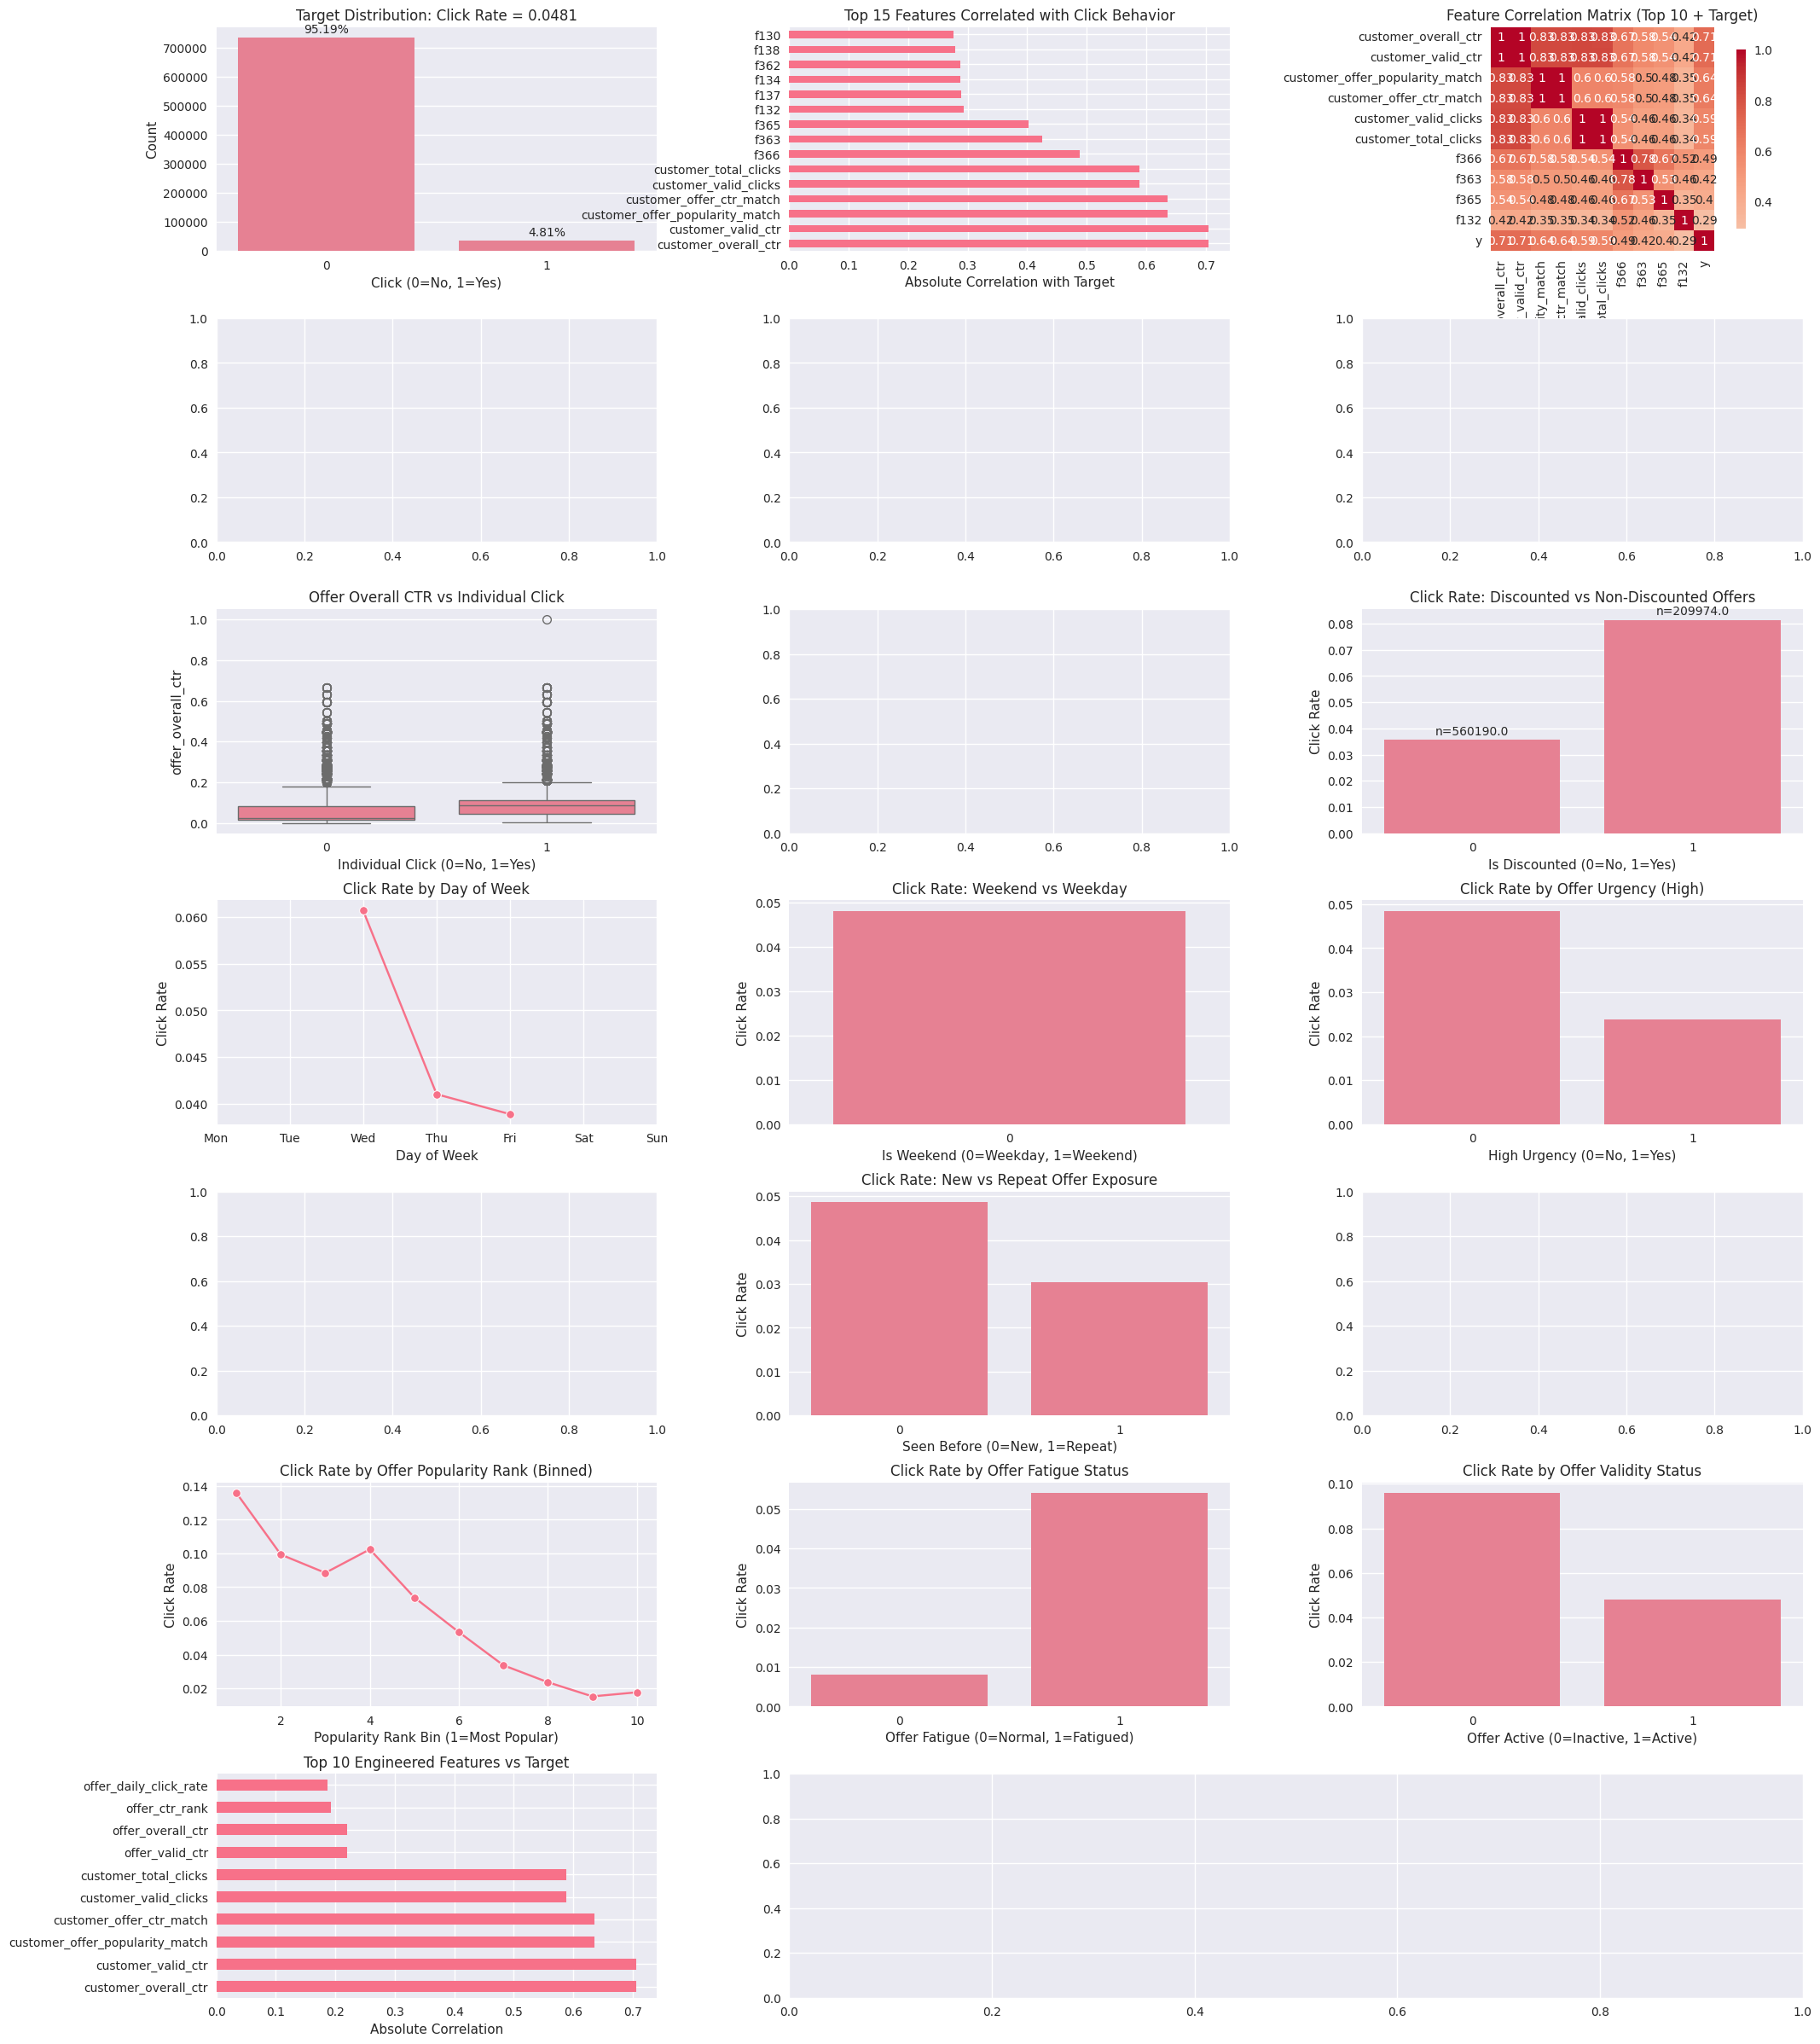

EDA SUMMARY INSIGHTS
Dataset Shape: (770164, 488)
Overall Click Rate: 0.0481
Total Customers: 46,550
Total Offers: 757

Top 5 Features Correlated with Clicks:
1. customer_overall_ctr: 0.7053
2. customer_valid_ctr: 0.7053
3. customer_offer_popularity_match: 0.6360
4. customer_offer_ctr_match: 0.6360
5. customer_valid_clicks: 0.5886

Discount Impact:
Non-discounted offers: 0.0356 click rate
Discounted offers: 0.0814 click rate

Temporal Patterns:
Weekday click rate: 0.0481
Weekend click rate: No data available
Data coverage: {0: 770164}


In [73]:
comprehensive_eda_analysis(final_df)

In [74]:
final_df


,id1,id2,id3,id4,id5,y,f1,f2,f5,f6,...,click_profile_segment_target_encoded,offer_duration_category_target_encoded,discount_tier_target_encoded,avg_click_signal_score,max_click_signal_score,active_click_signals,avg_digital_engagement_score,max_digital_engagement_score,active_digital_channels,rank_bin
0,NaT,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.048365,0.094164,0.048066,0.90,3.0,8,0.461538,3.0,4,1
1,NaT,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.047839,0.028698,0.048170,0.90,3.0,8,0.461538,3.0,4,2
2,NaT,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.048365,0.094164,0.048066,0.85,3.0,8,0.461538,3.0,4,4
3,NaT,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.047669,0.093249,0.047936,0.90,3.0,8,0.461538,3.0,4,3
4,NaT,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.047836,0.093962,0.048160,0.90,3.0,8,0.461538,3.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,NaT,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.054259,0.052661,0.048160,0.80,3.0,8,0.461538,3.0,4,8
770160,NaT,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.053776,0.028828,0.047936,0.80,3.0,8,0.461538,3.0,4,9
770161,NaT,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,42.0,37.0,...,0.054219,0.029021,0.048207,0.80,3.0,8,0.461538,3.0,4,8
770162,NaT,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,0.040788,0.028845,0.048160,0.80,3.0,8,0.730769,3.0,7,1
